In [1]:
from integrator.tree import Tree

hash = "f22421485e3987d60b5f98a8615413f4638587f56c783380c6810baf6fb4c457"
T, i = Tree.load_state(hash)

In [2]:
assert T.params
T.params
T.params["depth"]  = 6

In [3]:
G, x = T.max_score_triangle_subgraph(T.graph, return_start_node=True)
sources = [node for node, in_deg in G.in_degree() if in_deg == 0]
n = T.params["startNode"]
assert len(sources) == 1 and sources[0] == n, f"There is not exactly one source or the source is not node `n`. {sources}"

In [4]:
branchings = [node for node, out_degree in G.out_degree() if out_degree ==1]
branchings

['130.',
 '15.',
 '2021.',
 '119.',
 '166.',
 '76.',
 '156.',
 '48.',
 '200.',
 '86.',
 '154.',
 '87.',
 '116.',
 '118.',
 '120.',
 '18.',
 '75.',
 '23.',
 '176.',
 '41.',
 '168.',
 '198.',
 '42.',
 '170.',
 '136.',
 '47.']

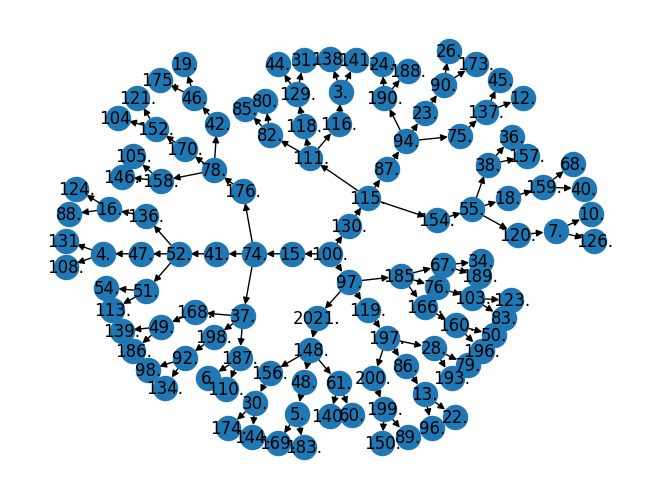

In [5]:
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx
import matplotlib.pyplot as plt
pos = graphviz_layout(G, prog="twopi")
nx.draw(G, pos, with_labels=True)
plt.show()

In [6]:
import os
from helper import tree, OutputLevel

path = "1/1/1"
file_dict = tree(
                basepath="../../dialectics/",
                startpath=path,
                format="json",
                keys=path.split("/"),
                info_radius=1,
                exclude=[".git", ".git.md", ".gitignore", ".DS_Store", ".idea"],
                pre_set_output_level=OutputLevel.FILENAMES,
                prefix_items=True,
                depth=os.environ.get("DEPTH", 4),
            )
file_dict

{1: {1: {1: {1: {'.': 'Be.md'},
    2: {'.': 'Nothing.md'},
    3: {1: {'.': 'Transition.md'},
     2: {'.': 'Coming-into-Being and Ceasing-to-Be.md'},
     3: {'.': 'Sublation.md'},
     '.': 'Becoming.md',
     '_': 'Sameness-Different.md'},
    '.': 'Ontology.md',
    '_': 'Vanishing-of-vanishing.md'}}}}

In [7]:
from lib.nested import extract_values

texts = extract_values(file_dict)
texts = [text.replace(".md", "") for text in texts]
texts

['Ontology',
 'Vanishing-of-vanishing',
 'Becoming',
 'Sameness-Different',
 'Sublation',
 'Coming-into-Being and Ceasing-to-Be',
 'Transition',
 'Nothing',
 'Be']

In [8]:
! export MODELS_CONFIG="../classifier/"
! export REDIS_HOST="localhost"
import os
os.system("echo $MODELS_CONFIG")
os.system("echo $REDIS_HOST")
from integrator.main import make_dialectics
os.environ["MODELS_CONFIG"] = "../classifier/"
os.environ["REDIS_HOST"] = "localhost"
! rm -rf ./states/test
t, (g, best_start_node) = make_dialectics(texts, 10)


../classifier/
2.834s     SUBSUMTION
           added 42 relations
           discarded 58 relations
0.000s     NEW GRAPH
2.838s   EPOCH 0
         BEST GRAPH 0 nodes and 0 edges
0.073s     SUBSUMTION
           added 9 relations
           discarded 91 relations
0.000s     NEW GRAPH
0.074s   EPOCH 1
         BEST GRAPH 0 nodes and 0 edges
0.072s     SUBSUMTION
           added 1 relations
           discarded 99 relations
0.000s     NEW GRAPH
0.073s   EPOCH 2
         BEST GRAPH 0 nodes and 0 edges
0.259s     THESIS ANTITHESIS SYNTHESIS
           added 50 relations
           discarded 31 relations
0.002s     NEW GRAPH
0.263s   EPOCH 3
         BEST GRAPH 8 nodes and 7 edges
0.128s     THESIS ANTITHESIS SYNTHESIS
           added 30 relations
           discarded 54 relations
0.002s     NEW GRAPH
0.134s   EPOCH 4
         BEST GRAPH 8 nodes and 7 edges
0.136s     THESIS ANTITHESIS SYNTHESIS
           added 17 relations
           discarded 67 relations
0.002s     NEW GRAPH
0.143s   

['Be', 'Vanishing-of-vanishing', 'Sublation', 'Transition', 'Coming-into-Being and Ceasing-to-Be', 'Sameness-Different', 'Nothing']


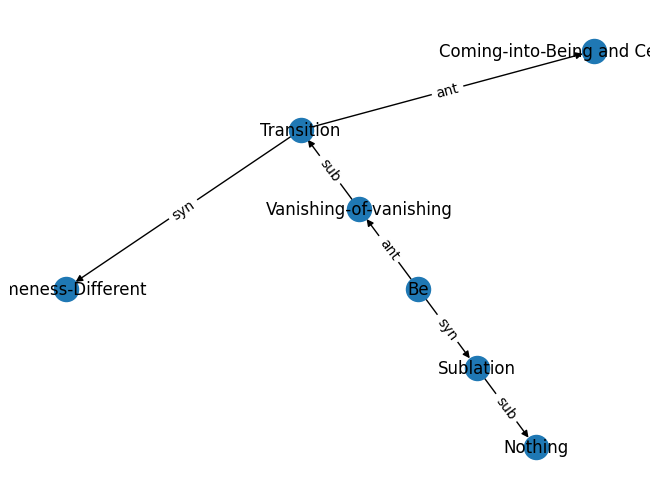

In [9]:
t.params["startNode"] = "Be"
g, best_start_node = t.max_score_triangle_subgraph(t.graph, 10)
print(g.nodes)
pos = graphviz_layout(g, prog="twopi")
nx.draw(g, pos, with_labels=True)
# Prepare edge labels
edge_labels = nx.get_edge_attributes(g, 'relation')

# Draw edge labels
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
plt.show()